In [1]:
!pip install easyocr opencv-python-headless Pillow matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 96.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 104.8 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import easyocr
import os


In [3]:
def show(img, cmap='gray', size=(8, 8)):
    plt.figure(figsize=size)
    if len(img.shape) == 2:
        plt.imshow(img, cmap=cmap)
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')


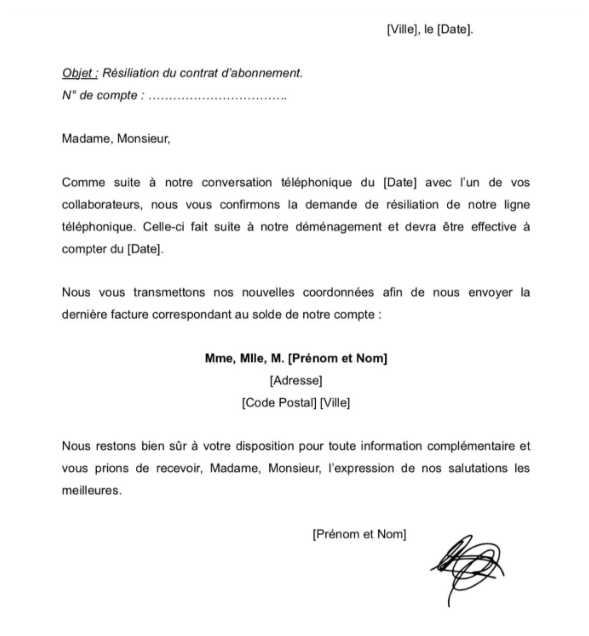

In [14]:
img = cv2.imread("/kaggle/input/document-signe/doc sign.png")
show(img)


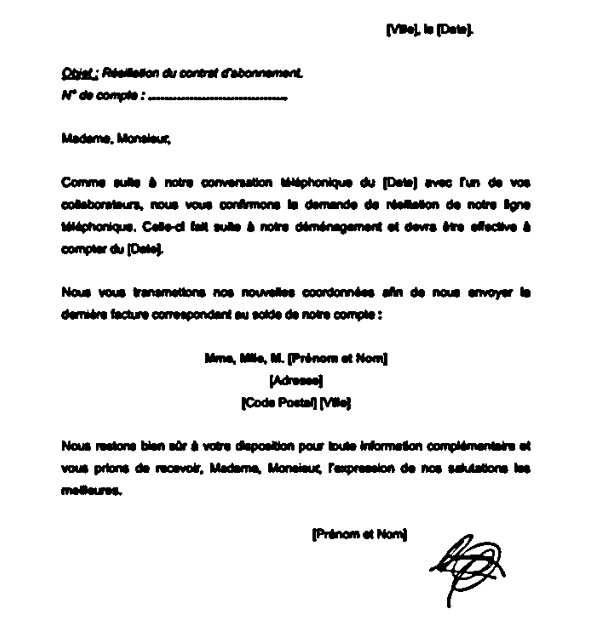

In [15]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Réduction de bruit
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Binarisation adaptative
th = cv2.adaptiveThreshold(
    blur,
    255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    31,
    2
)

show(th)


In [16]:
reader = easyocr.Reader(['ar', 'en'], gpu=True)

results = reader.readtext(img)

for (bbox, text, conf) in results:
    print(f"{text}  |  confidence = {conf:.2f}")


٢٧i١٥ ,]١١٥ [Date]  |  confidence = 0.36
ODSL  Resiliation uu contrat dabonnement  |  confidence = 0.16
08 COInpIe  |  confidence = 0.32
Madame, Monsieur  |  confidence = 0.95
Comme  |  confidence = 0.66
SUIt8  |  confidence = 0.39
٨٥Ire  |  confidence = 0.21
conversation  |  confidence = 0.92
telephonique  |  confidence = 0.82
[Date]  |  confidence = 0.95
٥٧٤C  |  confidence = 0.29
١٧٨  |  confidence = 0.56
٧05  |  confidence = 0.44
collaborateurs   |  confidence = 0.64
|0٧5  |  confidence = 0.30
٧0٧5  |  confidence = 0.26
confirmons  |  confidence = 0.97
la   demande  |  confidence = 0.72
resiliation  |  confidence = 0.99
٨٥،٢٥  |  confidence = 0.19
ligne  |  confidence = 0.45
telephonique   |  confidence = 0.90
Celle ci fait suite  |  confidence = 0.81
٨٥t٢٥  |  confidence = 0.15
demenagement et devra قtre  |  confidence = 0.60
effective  |  confidence = 0.60
compter 0u [Datel  |  confidence = 0.54
Nous  |  confidence = 0.95
vous   transmettons  |  confidence = 0.54
٨05  |  confiden

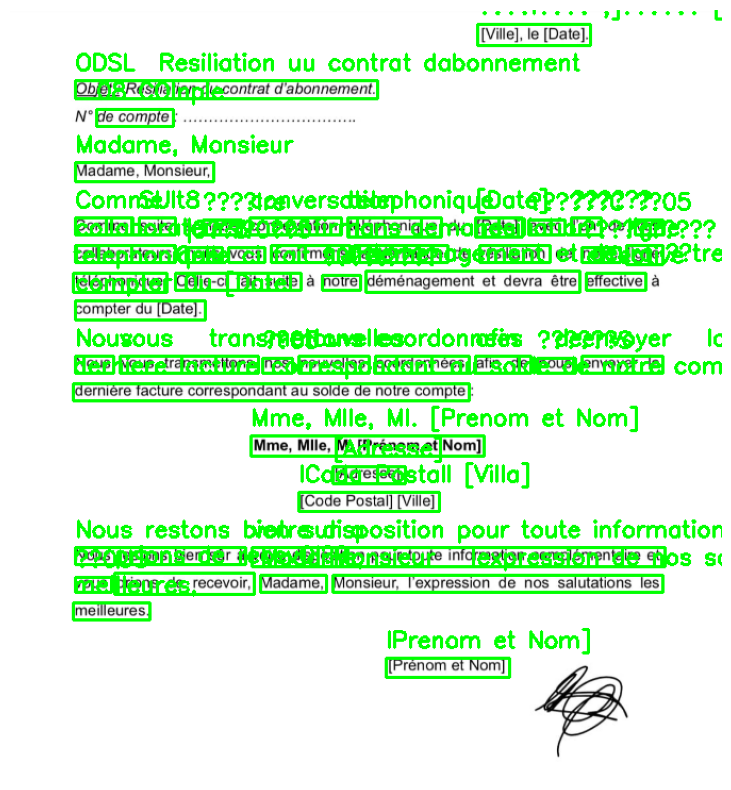

In [17]:
img_ocr = img.copy()

for (bbox, text, conf) in results:
    pts = np.array(bbox).astype(int)
    cv2.polylines(img_ocr, [pts], True, (0, 255, 0), 2)
    cv2.putText(img_ocr, text, (pts[0][0], pts[0][1] - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

show(img_ocr, size=(10, 10))


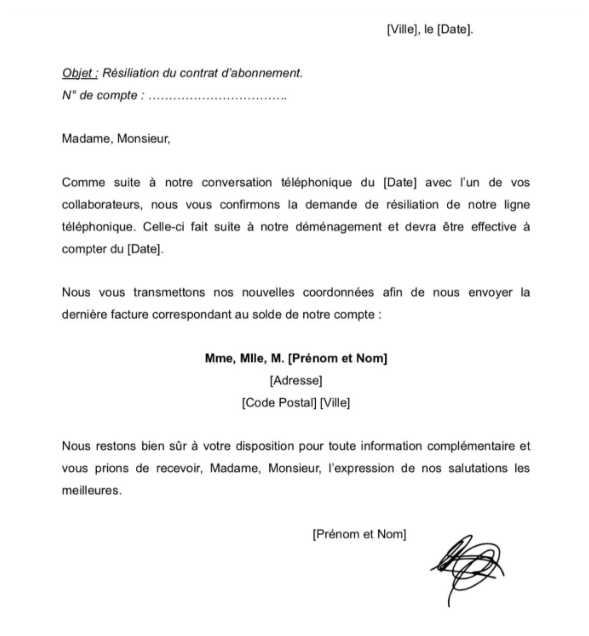

In [18]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

faces = face_cascade.detectMultiScale(gray, 1.2, 5)

img_faces = img.copy()
for (x, y, w, h) in faces:
    cv2.rectangle(img_faces, (x, y), (x+w, y+h), (0, 255, 0), 3)

show(img_faces)


In [22]:
# ---- Détection de signatures améliorée ----
import cv2
import numpy as np

def detect_signatures(img, debug=True):
    """
    Renvoie une image avec les bounding boxes des signatures et la liste des boxes.
    Stratégie :
    1) Crop zone bas du document (optionnel) pour prioriser signature
    2) Binarisation adaptative + inversion
    3) Morphology pour relier les traits
    4) Contours + filtrage par taille/aspect/solidity/ratio of black pixels
    5) Score de "signature-likeness" basé sur densité de traits
    """
    H, W = img.shape[:2]
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 1) Optionnel : ne chercher que dans le bas du document (décommenter si utile)
    # crop_y = int(H * 0.55)
    # roi = img_gray[crop_y:H, 0:W]
    # roi_origin = (0, crop_y)
    roi = img_gray.copy()
    roi_origin = (0, 0)

    # 2) Binarisation adaptative + inversion (signature souvent sombre)
    th = cv2.adaptiveThreshold(roi, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY_INV, 25, 10)

    # 3) Morphological: close pour relier traits, then open pour enlever bruit
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
    close = cv2.morphologyEx(th, cv2.MORPH_CLOSE, kernel, iterations=2)
    open_ = cv2.morphologyEx(close, cv2.MORPH_OPEN, kernel, iterations=1)

    # 4) Detect contours
    cnts, _ = cv2.findContours(open_, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    boxes = []
    img_out = img.copy()

    for c in cnts:
        x, y, w, h = cv2.boundingRect(c)
        # Remonter aux coordonnées globales
        gx, gy = x + roi_origin[0], y + roi_origin[1]

        # Heuristiques basiques sur taille et forme
        if w < 80 or h < 10:
            continue
        if w/h < 2:          # signature tend à être allongée
            continue
        if w > W * 0.9:      # pas une ligne pleine
            continue

        # Extraire le patch binaire pour mesurer la densité/complexité
        patch = open_[y:y+h, x:x+w]
        total_pixels = patch.size
        black_pixels = cv2.countNonZero(patch)  # ici invert -> 'ink' = white in patch
        ink_density = black_pixels / (total_pixels + 1e-9)

        # Solidity (aide à différencier bloc plein vs traits fins)
        hull = cv2.convexHull(c)
        hull_area = cv2.contourArea(hull)
        cnt_area = cv2.contourArea(c)
        solidity = cnt_area / (hull_area + 1e-9)

        # Score heuristique de signature
        score = 0
        # signatures : densité modérée (pas trop plein), solidity faible (traits fins)
        if 0.02 < ink_density < 0.35:
            score += 1
        if solidity < 0.6:
            score += 1
        if w/h > 3:
            score += 1
        # zone basse du document (bonus)
        if gy > H * 0.5:
            score += 0.5

        # Accept if score suffisant
        if score >= 2:
            boxes.append((gx, gy, w, h, score, ink_density, solidity))
            cv2.rectangle(img_out, (gx, gy), (gx+w, gy+h), (255, 0, 0), 2)
            cv2.putText(img_out, f"{score:.1f}", (gx, gy-6),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,0,0), 2)

    if debug:
        # Show intermediate steps
        from matplotlib import pyplot as plt
        plt.figure(figsize=(14,6))
        plt.subplot(1,3,1); plt.title("Gray ROI"); plt.imshow(roi, cmap='gray'); plt.axis('off')
        plt.subplot(1,3,2); plt.title("Binarized inverted"); plt.imshow(th, cmap='gray'); plt.axis('off')
        plt.subplot(1,3,3); plt.title("Morpho -> candidates"); plt.imshow(open_, cmap='gray'); plt.axis('off')
        plt.show()

        show(img_out, size=(12,8))

        if len(boxes)==0:
            print("Aucune signature détectée par l'heuristique. Essaie :\n"
                  "- augmenter le crop bas (rechercher sur plus bas du document)\n"
                  "- diminuer les seuils de densité\n"
                  "- vérifier la qualité de l'image (contraste / flou)")

    return img_out, boxes

# Usage
img_sig, sig_boxes = detect_signatures(img, debug=True)
print("Boxes trouvées:", sig_boxes)


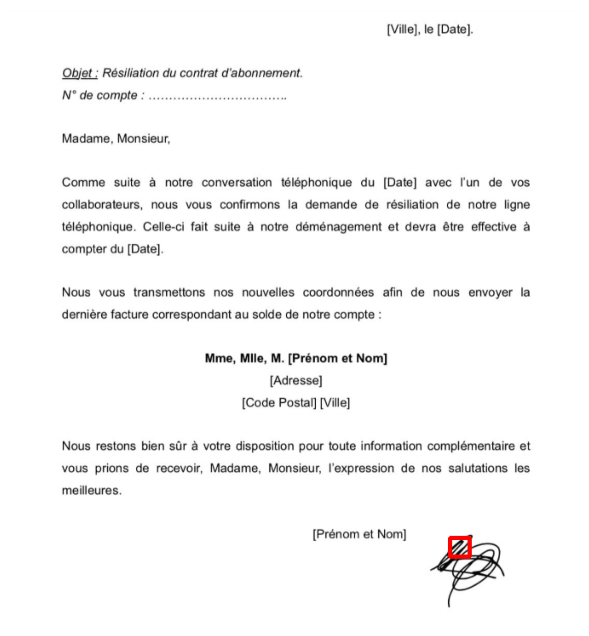

In [20]:
cnts, _ = cv2.findContours(th, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

img_cb = img.copy()

for c in cnts:
    x, y, w, h = cv2.boundingRect(c)
    ratio = w / float(h)
    
    # carré + taille raisonnable
    if 0.8 < ratio < 1.2 and 20 < w < 80:
        cv2.rectangle(img_cb, (x, y), (x+w, y+h), (0, 0, 255), 3)

show(img_cb)


## Face detection

W0000 00:00:1763723049.461387     365 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


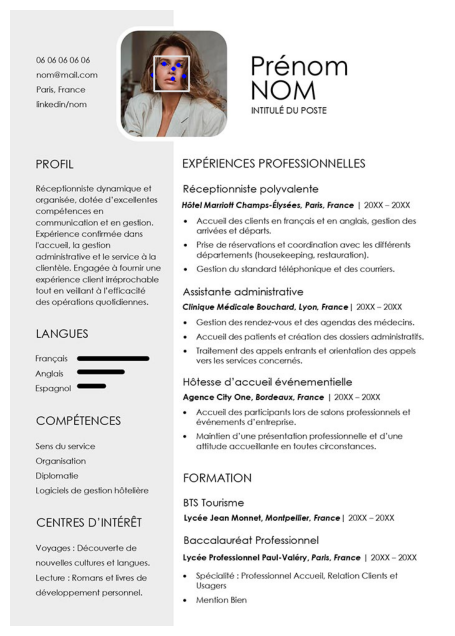

In [65]:
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt

def show(img):
    plt.figure(figsize=(8,8))
    plt.imshow(img)
    plt.axis("off")

mp_face = mp.solutions.face_detection
mp_draw = mp.solutions.drawing_utils

img = cv2.imread("/kaggle/input/image-cv/cv.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

with mp_face.FaceDetection(model_selection=1, min_detection_confidence=0.5) as face_detector:
    results = face_detector.process(img_rgb)

if results.detections:
    for detection in results.detections:
        mp_draw.draw_detection(img_rgb, detection)

show(img_rgb)


W0000 00:00:1763723282.882828     385 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


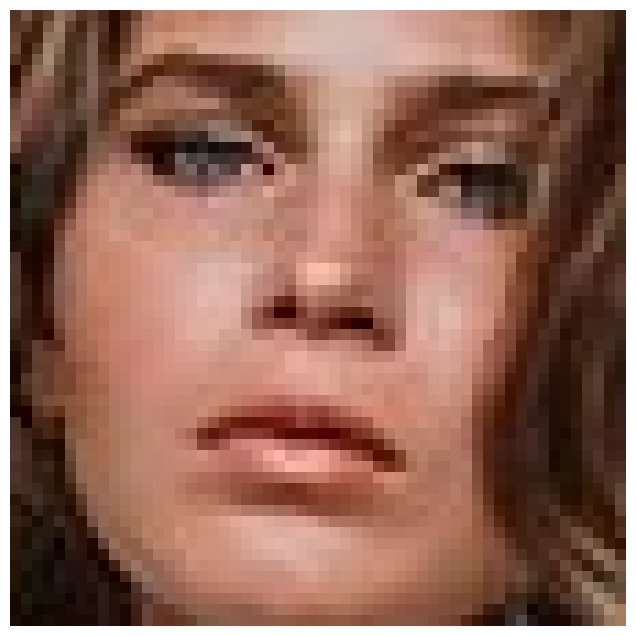

In [67]:
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt

def show(img):
    plt.figure(figsize=(8,8))
    plt.imshow(img)
    plt.axis("off")

mp_face = mp.solutions.face_detection
mp_draw = mp.solutions.drawing_utils

img = cv2.imread("/kaggle/input/image-cv/cv.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

h, w, _ = img_rgb.shape

with mp_face.FaceDetection(model_selection=1, min_detection_confidence=0.5) as face_detector:
    results = face_detector.process(img_rgb)

if results.detections:
    for detection in results.detections:
        # coordonnées normalisées
        box = detection.location_data.relative_bounding_box
        x, y, bw, bh = box.xmin, box.ymin, box.width, box.height

        # conversions en pixels
        x, y = int(x * w), int(y * h)
        bw, bh = int(bw * w), int(bh * h)

        # crop du visage
        face_crop = img_rgb[y:y+bh, x:x+bw]

        show(face_crop)


W0000 00:00:1763723293.184992     393 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1763723293.198963     392 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


(-0.5, 699.5, 989.5, -0.5)

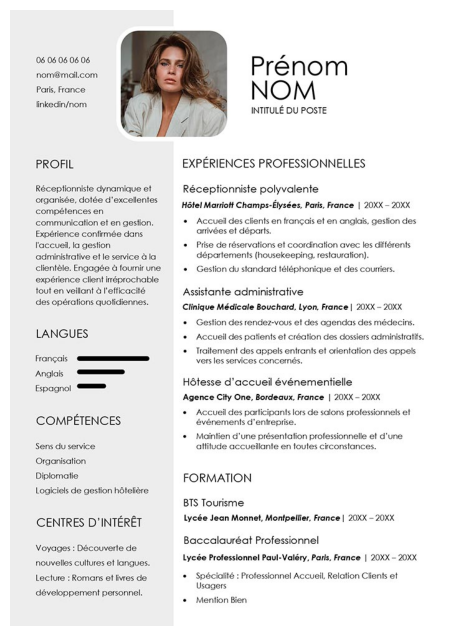

In [68]:
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt

mp_mesh = mp.solutions.face_mesh
mp_draw = mp.solutions.drawing_utils

img = cv2.imread("/kaggle/input/image-cv/cv.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

with mp_mesh.FaceMesh(static_image_mode=True, max_num_faces=1) as face_mesh:
    results = face_mesh.process(img_rgb)

if results.multi_face_landmarks:
    for face in results.multi_face_landmarks:
        mp_draw.draw_landmarks(
            img_rgb, face, mp_mesh.FACEMESH_TESSELATION
        )

plt.figure(figsize=(8,8))
plt.imshow(img_rgb)
plt.axis("off")
